# 주제 : 전이학습 (Transfer Learning)
---
* Colab GPU 옵션
* 학습된 모델을 사용하는 전이학습을 이해한다
##- ResNet50 을 이용한 전이학습

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

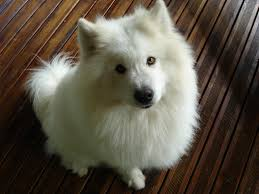

In [ ]:
model = ResNet50(weights='imagenet')

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02111889', 'Samoyed', 0.95579505), ('n02114548', 'white_wolf', 0.018570937), ('n02112018', 'Pomeranian', 0.009478804)]


-------------------------------------------------------------------------
#cat-dog 전이학습

## - 구글 드라이브 → /content/drive/MyDrive/Fly-AI/Datasets/PetImages
-------------------------------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
from tensorflow.keras import models, layers

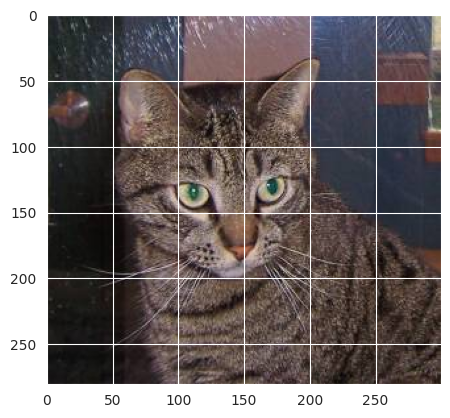

In [ ]:
image = imread('/content/drive/MyDrive/Fly-AI/Datasets/PetImages/train/cat/1.jpg')
pyplot.imshow(image)
pyplot.show()

In [ ]:
train_dir = '/content/drive/MyDrive/Fly-AI/Datasets/PetImages/train'
test_dir = '/content/drive/MyDrive/Fly-AI/Datasets/PetImages/test'

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(128, 128),
                                                    batch_size=20,
                                                    class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(128, 128),
                                                  batch_size=20,
                                                  class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs = 10,
                    validation_data = test_generator,
                    validation_steps=5)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.5690 - loss: 0.9449 - val_accuracy: 0.5800 - val_loss: 0.6945
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6530 - loss: 0.6371 - val_accuracy: 0.6600 - val_loss: 0.6417
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6843 - loss: 0.5969

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.6843 - loss: 0.5969
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.7007 - loss: 0.5581 - val_accuracy: 0.7200 - val_loss: 0.5644
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.7078 - loss: 0.5657 - val_accuracy: 0.6800 - val_loss: 0.6249
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.7306 - loss: 0.5259
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7518 - loss: 0.5076 - val_accuracy: 0.6700 - val_loss: 0.6257
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7801 - loss: 0.4981 - val_accuracy: 0.8000 - val_loss: 0.5454
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7787 - loss: 0.4559
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7947 - loss: 0.4268 - val_accuracy: 0.7300 - val_loss: 0.6133


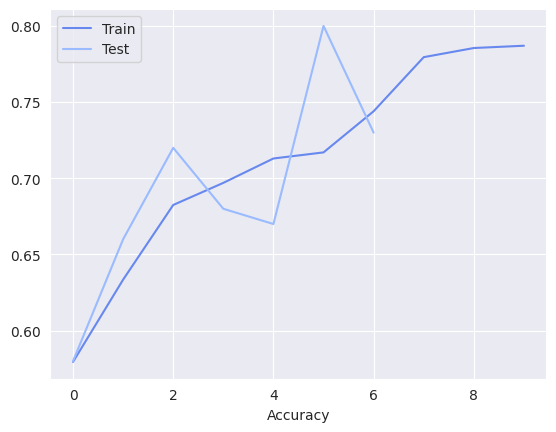

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

-------------------------------------------------------------------------
#MobileNet + 새로운 신경망 전이학습
* cat & dog 분류
-------------------------------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


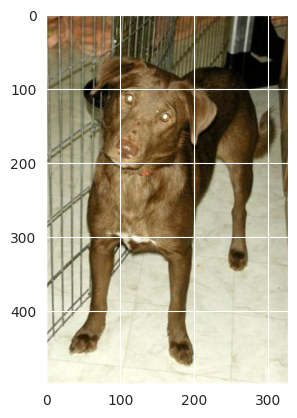

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

image = imread('/content/drive/MyDrive/Fly-AI/Datasets/PetImages/train/dog/1.jpg')
pyplot.imshow(image)
pyplot.show()

from tensorflow.keras import models, layers

train_dir = '/content/drive/MyDrive/Fly-AI/Datasets/PetImages/train'
test_dir = '/content/drive/MyDrive/Fly-AI/Datasets/PetImages/test'

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(128, 128),
                                                    batch_size=20,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(128, 128),
                                                  batch_size=20,
                                                  I’m vclass_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=5)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.5149 - loss: 0.9469 - val_accuracy: 0.5500 - val_loss: 0.6887
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5600 - val_loss: 0.6823
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.5803 - loss: 0.6741
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5200 - val_loss: 0.6938
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6577 - loss: 0.6337 - val_accuracy: 0.6500 - val_loss: 0.6060
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 581ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.6844 - loss: 0.5990 - val_accuracy: 0.6800 - val_loss: 0.6401
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.7477
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.6854 - loss: 0.5890
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0000

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

-------------------------------------------------------------------------
#CIFAR-10 전이학습
* [cifar 사이트](https://www.cs.toronto.edu/~kriz/cifar.html) 참조
-------------------------------------------------------------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

## Step 1. VGG16

### 문제 1. 데이터 준비

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

### 문제 2. 라벨 데이터 준비

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

### 문제 3. 데이터 시각화

In [ ]:
# 랜덤 데이터 선택

sample_size = 9
random_idx = np.random.randint(x_train.shape[0], size = sample_size)

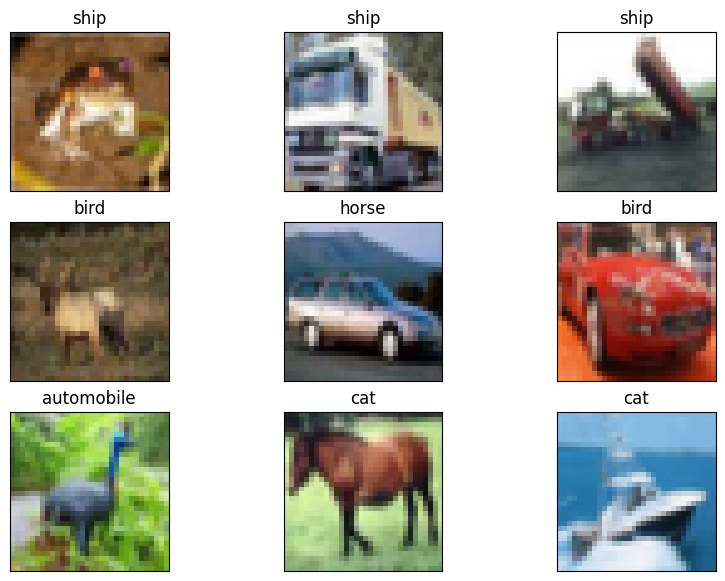

In [ ]:
fig = plt.figure(figsize=(10, 7))

for i, idx in enumerate(random_idx):
    ax = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
    ax.set_title((class_names[y_train[idx][0]]))
    ax.imshow(x_train[i])
plt.show()

In [ ]:
type(x_train), x_train.shape

(numpy.ndarray, (50000, 32, 32, 3))

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_dataset = tf.data.Dataset.from_tensor_slices({"image":x_train, "label":y_train})
valid_dataset = tf.data.Dataset.from_tensor_slices({"image":x_test, "label":y_test})

print(type(train_dataset), len(train_dataset))
print(type(valid_dataset), len(valid_dataset))

<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> 50000
<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> 10000


In [ ]:
for data in train_dataset.take(2):
     print(len(data))
     print(type(data))
     print(data)

2
<class 'dict'>
{'image': <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        .

In [ ]:
def preprocess(data):
    # x, y 데이터를 정의합니다.
    x = data['image']
    y = data['label']
    # image 정규화(Normalization)
    x = x / 255
    # 사이즈를 (224, 224)로 변환합니다.
    x = tf.image.resize(x, size=(32, 32))
    # x, y  데이터를 return 합니다.
    return x, y

In [ ]:
batch_size=256

train_data = train_dataset.map(preprocess).batch(batch_size)
valid_data = train_dataset.map(preprocess).batch(batch_size)

### 문제 4. 학습된 모델 불러오기

#### VGG16 모델

<img width="600" src="_images/vgg16_arch.png">

<img width="600" src="https://blog.kakaocdn.net/dn/b1Vk5P/btqwqjujKsa/TL2HyQ4kj6pNPz4TsirknK/img.png">  

In [ ]:
from tensorflow.keras.applications import VGG16

# imagenet을 학습한 모델을 불러옵니다.
vgg16 = VGG16(weights = 'imagenet',
              input_shape = (32, 32, 3),
              include_top = False)  # 분류층 제외
vgg16.trainable = False

vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# 학습 가능 가중치 확인

len(vgg16.trainable_weights)

0

In [ ]:
# 만약, 일부 레이어만 동결 해제

# for layer in vgg16.layers[-4:]:
#     layer.trainable = True

In [ ]:
### 문제 8. 모델 구성하기

In [ ]:
def build_model():
    model = keras.Sequential()
    model.add(vgg16)
    # 분류기 구성
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dense(10, activation = 'softmax'))

    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,610 (56.65 MB)

 Trainable params: 134,410 (525.04 KB)

 Non-trainable params: 14,715,200 (56.13 MB)

### 문제 5. 모델 컴파일

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

### 문제 6. 학습 시키기

In [ ]:
epochs = 5

history = model.fit(train_data,
                    validation_data=(valid_data),
                    epochs=epochs)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step - acc: 0.2278 - loss: 2.2621 - val_acc: 0.4154 - val_loss: 1.7341
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - acc: 0.4862 - loss: 1.4963 - val_acc: 0.5085 - val_loss: 1.4374
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - acc: 0.5381 - loss: 1.3513 - val_acc: 0.5509 - val_loss: 1.3101
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - acc: 0.5633 - loss: 1.2724 - val_acc: 0.5751 - val_loss: 1.2395
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - acc: 0.5823 - loss: 1.2188 - val_acc: 0.5903 - val_loss: 1.1911


In [ ]:
# epochs = 5    # 100
# history = model.fit(x_train, y_train,
#                     epochs = epochs,
#                     validation_data = (x_val, y_val))

### 문제 7. 학습 결과 시각화

In [ ]:
history.history.keys()

In [ ]:
import matplotlib.pyplot as plt

def plot_training(history, epochs):
    his_dict = history.history
    loss = his_dict['loss']
    val_loss = his_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize = (15, 7))

    # 훈련 및 검증 손실 그리기
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b--', label = 'train_loss')
    ax1.plot(epochs, val_loss, 'r--', label = 'val_loss')
    ax1.set_title('train and val loss')
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('loss')
    ax1.legend()

    acc = his_dict['acc']
    val_acc = his_dict['val_acc']

    # 훈련 및 검증 정확도 그리기
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, acc, 'b--', label = 'train_accuracy')
    ax2.plot(epochs, val_acc, 'r--', label = 'val_accuracy')
    ax2.set_title('train and val accuracy')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('loss')
    ax2.legend()

    plt.show()

In [ ]:
plot_training(history, epochs)

### 8. 평가하기

In [ ]:
model.evaluate(valid_data)

### 9. 모델 저장하기

In [ ]:
model.save('temp/cifar10.h5')

### 10. 모델 로드하기

In [ ]:
loaded_model = tf.keras.models.load_model('temp/cifar10.h5')

In [ ]:
model.evaluate(valid_data)

## Step 2. Resnet 50

#### MobileNetV2 모델을 이용해서 cifar10을 분류하세요

-------------------------------------------------------------------------
#※ SimpleRNN
-------------------------------------------------------------------------

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

train_X = [[]
    [0.1, 4.2, 1.5, 1.1, 2.8],
     [1.0, 3.1, 2.5, 0.7, 1.1],
      [0.3, 2.1, 1.5, 2.1, 0.1],
       [2.2, 1.4, 0.5, 0.9, 1.1]]]
print(np.shape(train_X))

In [ ]:
train_X = [[
    [0.1, 4.2, 1.5, 1.1, 2.8],
     [1.0, 3.1, 2.5, 0.7, 1.1],
      [0.3, 2.1, 1.5, 2.1, 0.1],
       [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)

print(train_X.shape)

-------------------------------------------------------------------------
#※ Spam-NLP
-------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Unnamed2,3,4 삭제

data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#레이불 넣기

data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#label encodding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isnull().sum()

,0
target,0
text,0


In [ ]:
# 중복데이터 확인
data.duplicated().sum()

403

In [ ]:
# 중복 제거
data.drop_duplicates(keep='first',inplace=True)
data.shape

(5169, 2)

In [ ]:
print(f'정상 메일의 비율 = {round(data["target"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(data["target"].value_counts()[1]/len(data) * 100,3)}%')

정상 메일의 비율 = 87.367%
스팸 메일의 비율 = 12.633%


In [ ]:
#중복확인
data.duplicated().sum()

0

In [ ]:
X_data = data['text']
y_data = data['target']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


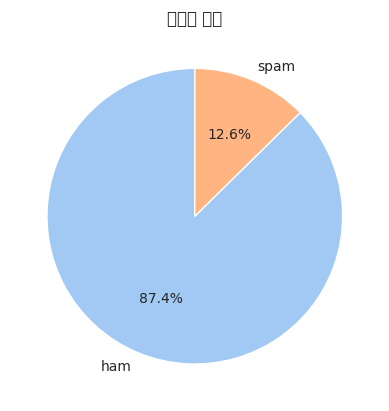

In [ ]:
#데이터 시각화
plt.pie(data['target'].value_counts(),
        labels=['ham', 'spam'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('데이터 분포')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#글자수 확인
data['num_chars'] = data['text'].apply(len)
data.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#단어수 확인
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#문장 수

data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data.describe()

,target,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
# 햄 메시지 확인
data[data['target'] == 0][['num_chars', 'num_words', 'num_sentences' ]].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# 스팸 메시지 확인
data[data['target'] == 1][['num_chars', 'num_words', 'num_sentences' ]].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


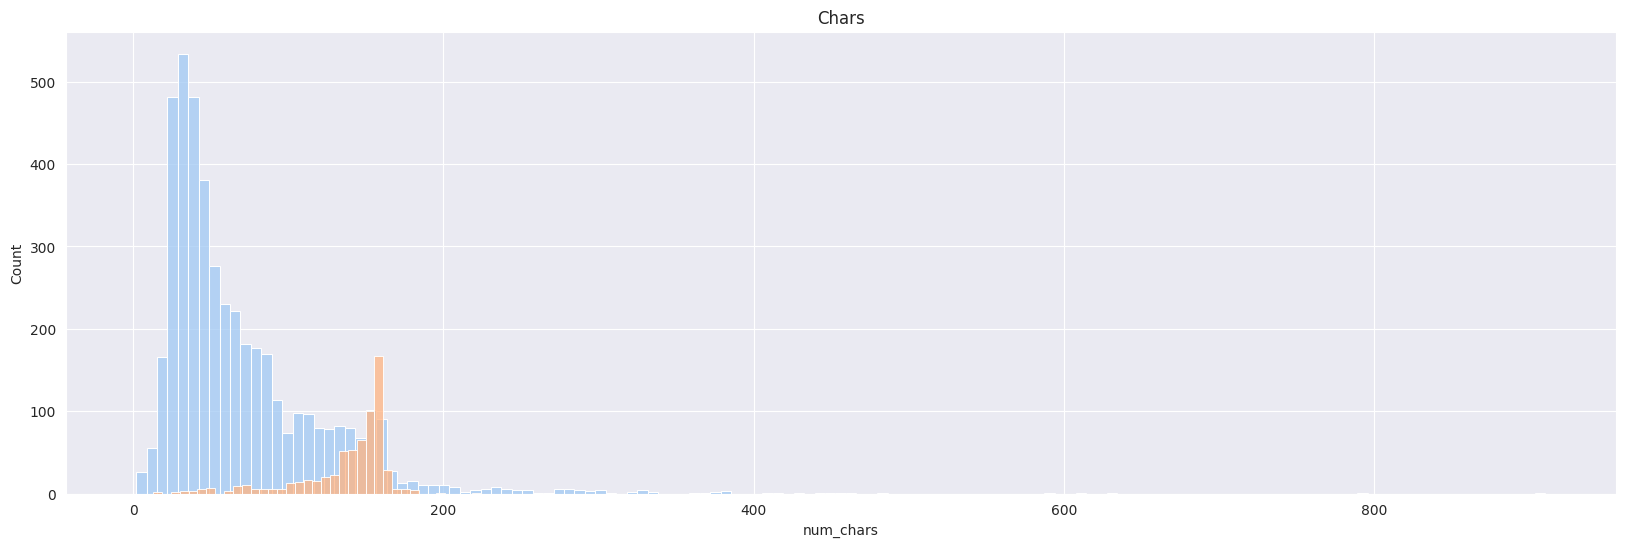

In [ ]:
# 글자 데이터 시각화

sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_chars'])
sns.histplot(data[data['target'] == 1]['num_chars'])
plt.title('Chars')
plt.show()

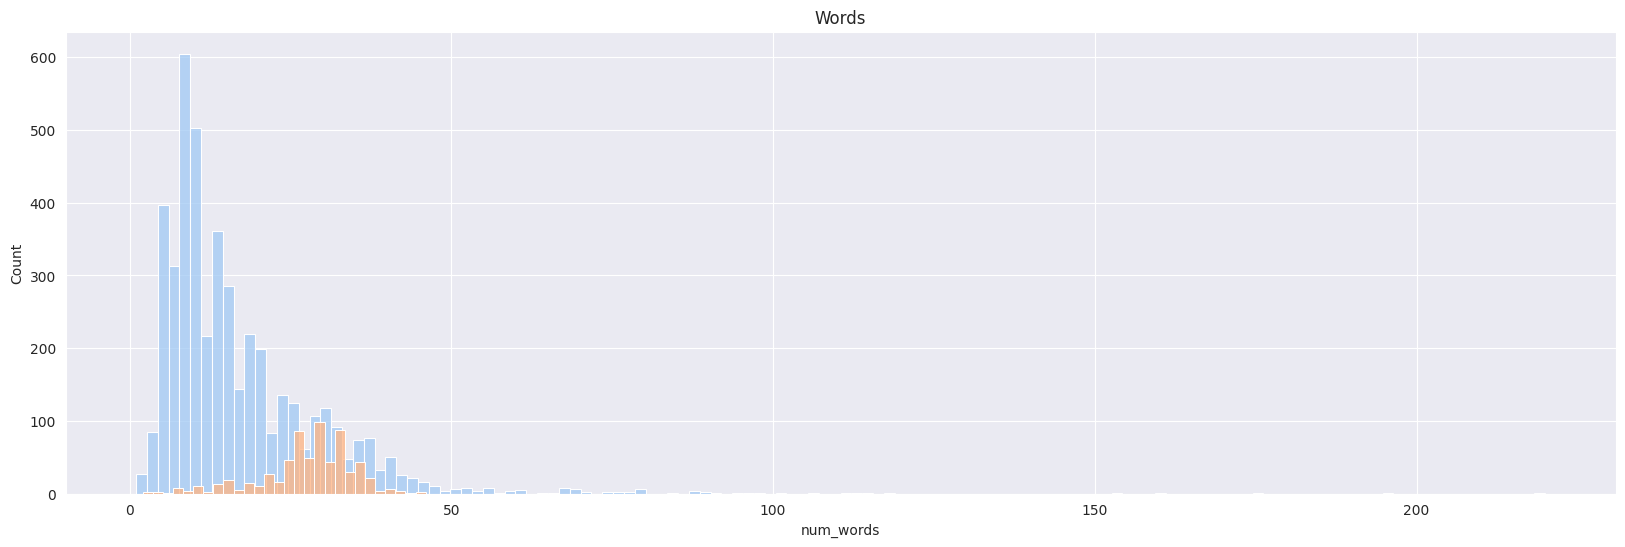

In [ ]:
# 단어 데이터 시각화
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'])
plt.title('Words')
plt.show()

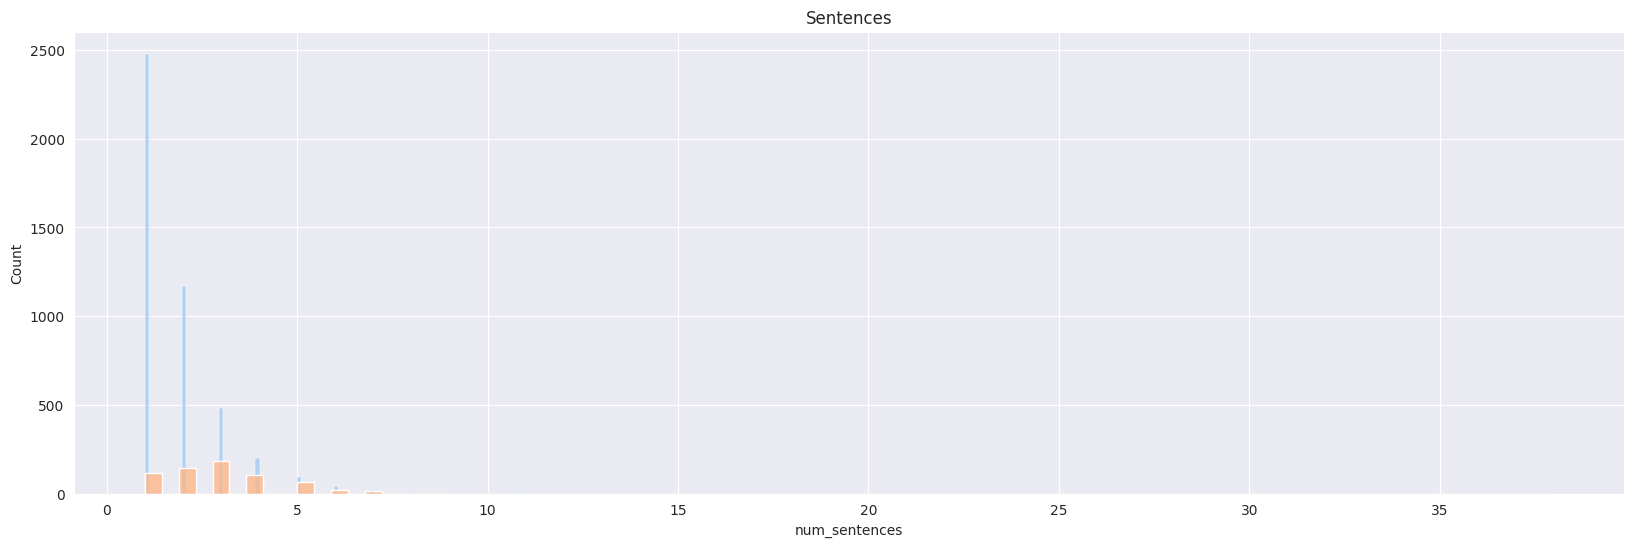

In [ ]:
#문장 시각화

sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_sentences'])
sns.histplot(data[data['target'] == 1]['num_sentences'])
plt.title('Sentences')
plt.show()

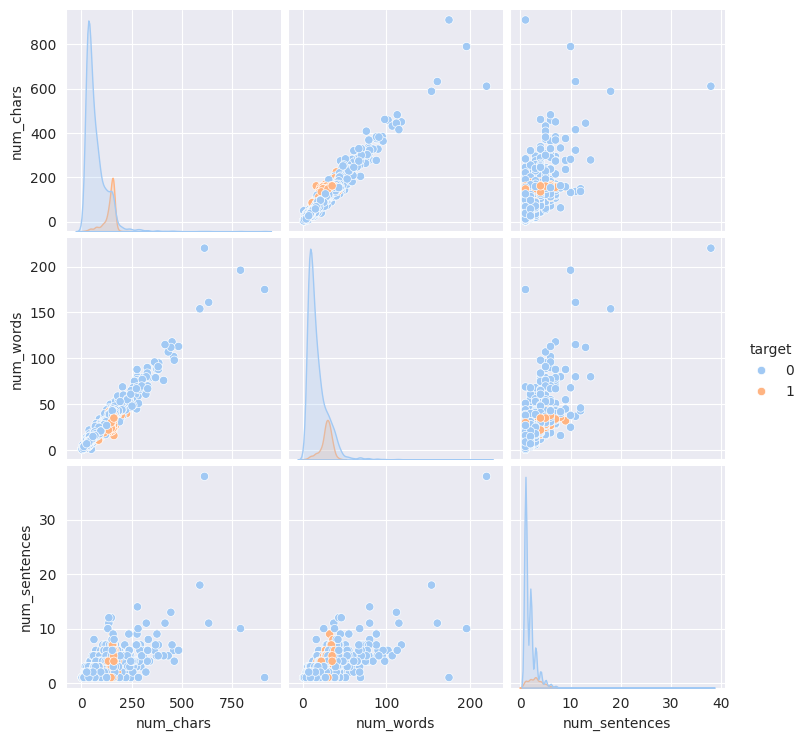

In [ ]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
sns.pairplot(data, hue='target')
plt.show()

In [ ]:
# chars, words, sentences 상관관계
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

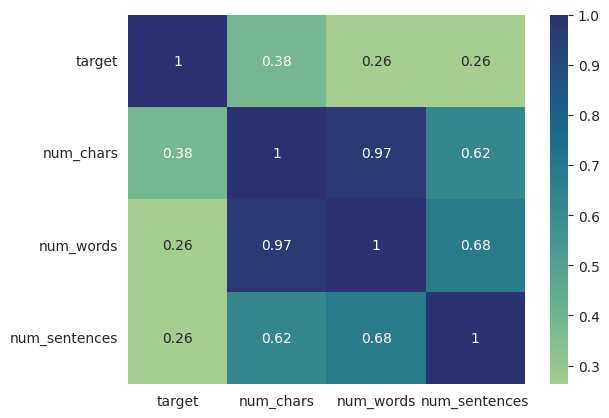

In [ ]:
#히트맴으로 분포 보기
sns.heatmap(numeric_data.corr(), annot=True, cmap='crest')

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [ ]:
#불용어 처리
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [ ]:
transform_text('I am learning Python and I am learning Machine Learning')

'learn python learn machin learn'

In [ ]:
transform_text(data['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
data['transformed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for message in data[data['target'] == 1]['transformed_text']:
    for word in message.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

In [ ]:
ham_corpus = []
for message in data[data['target'] == 0]['transformed_text']:
    for word in message.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

etc = ExtraTreeClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [ ]:
classifiers = {
    'Extra Tree Classifier': etc,
    'Support Vector Classifier': svc,
    'K Neighbors Classifier': knn,
    'Random Forest Classifier': rfc,
    'Decision Tree Classifier': dtc,
    'Multinomial Naive Bayes': mnb,
    'Gaussian Naive Bayes': gnb,
    'Bernoulli Naive Bayes': bnb
}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # Bag of Words

cv = CountVectorizer()
data.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
X = cv.fit_transform(data['transformed_text'],
                     data['num_chars']).toarray()
y = data['target'].values

X.shape, y.shape

((5169, 6708), (5169,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

In [ ]:
def evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers):
    precision_scores = []
    accuracy_scores = []

    for name, model in classifiers.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        precision_scores.append(precision)
        accuracy_scores.append(accuracy)

    performance_df = pd.DataFrame({
        'Model': list(classifiers.keys()),
        'Accuracy': accuracy_scores,
        'Precision': precision_scores
        }).sort_values(by='Precision', ascending=False)
    return performance_df

In [ ]:
performance_cv = evaluate_vectorizer(X_train, X_test,
                                     y_train, y_test,
                                     classifiers)
print(performance_cv)

                       Model  Accuracy  Precision
2     K Neighbors Classifier  0.906190   1.000000
3   Random Forest Classifier  0.971954   1.000000
7      Bernoulli Naive Bayes  0.970019   0.973451
4   Decision Tree Classifier  0.926499   0.942857
0      Extra Tree Classifier  0.945841   0.866071
5    Multinomial Naive Bayes  0.964217   0.834437
1  Support Vector Classifier  0.926499   0.742188
6       Gaussian Naive Bayes  0.880077   0.531532


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() # default

In [ ]:
X1 = tfidf.fit_transform(data['transformed_text'], data['num_chars']).toarray()
y1 = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                                    test_size=0.2,
                                                    random_state=2)

In [ ]:
performance_tfidf = evaluate_vectorizer(X_train, X_test,
                                        y_train, y_test,
                                        classifiers)
performance_tfidf

,Model,Accuracy,Precision
2,K Neighbors Classifier,0.900387,1.000000
3,Random Forest Classifier,0.971954,1.000000
5,Multinomial Naive Bayes,0.959381,1.000000
1,Support Vector Classifier,0.972921,0.974138
7,Bernoulli Naive Bayes,0.970019,0.973451
4,Decision Tree Classifier,0.935203,0.838095
0,Extra Tree Classifier,0.941006,0.803150
6,Gaussian Naive Bayes,0.876209,0.523148


In [ ]:
tfidf1 = TfidfVectorizer(max_features=3000) # max_features = 3000

X2 = tfidf1.fit_transform(data['transformed_text'],
                          data['num_chars']).toarray()
y2 = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X2, y2,
                                                    test_size=0.2,
                                                    random_state=2)

In [ ]:
performance_tfidf_3000 = evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers)
performance_tfidf_3000

,Model,Accuracy,Precision
7,Bernoulli Naive Bayes,0.983559,0.991870
3,Random Forest Classifier,0.975822,0.982906
2,K Neighbors Classifier,0.905222,0.976190
5,Multinomial Naive Bayes,0.978723,0.946154
1,Support Vector Classifier,0.969052,0.927419
4,Decision Tree Classifier,0.929400,0.828283
0,Extra Tree Classifier,0.949710,0.807143
6,Gaussian Naive Bayes,0.872340,0.512821


In [ ]:
# Minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
# Scaling the data
X3 = tfidf1.fit_transform(data['transformed_text'],
                          data['num_chars']).toarray()
X3 = scaler.fit_transform(X3)

y3 = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X3, y3,
                                                    test_size=0.2,
                                                    random_state=2)

In [ ]:
performance_scaled = evaluate_vectorizer(X_train, X_test,
                                         y_train, y_test,
                                         classifiers)
performance_scaled

,Model,Accuracy,Precision
7,Bernoulli Naive Bayes,0.983559,0.991870
3,Random Forest Classifier,0.975822,0.982906
2,K Neighbors Classifier,0.905222,0.976190
5,Multinomial Naive Bayes,0.978723,0.946154
1,Support Vector Classifier,0.969052,0.927419
0,Extra Tree Classifier,0.948743,0.840000
4,Decision Tree Classifier,0.927466,0.811881
6,Gaussian Naive Bayes,0.872340,0.512821


In [ ]:
performance_temp = pd.merge(
    performance_cv,
    performance_tfidf,
    on='Model',
    how='inner',
    suffixes=('_cv', '_default')
)

performance_temp2 = pd.merge(
    performance_temp,
    performance_tfidf_3000,
    on='Model',
    how='inner'
)

performance = pd.merge(
    performance_temp2,
    performance_scaled,
    on='Model',
    how='inner',
    suffixes=('_3000', '_scaled')
)

performance

,Model,Accuracy_cv,Precision_cv,Accuracy_default,Precision_default,Accuracy_3000,Precision_3000,Accuracy_scaled,Precision_scaled
0,K Neighbors Classifier,0.906190,1.000000,0.900387,1.000000,0.905222,0.976190,0.905222,0.976190
1,Random Forest Classifier,0.971954,1.000000,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
2,Bernoulli Naive Bayes,0.970019,0.973451,0.970019,0.973451,0.983559,0.991870,0.983559,0.991870
3,Decision Tree Classifier,0.926499,0.942857,0.935203,0.838095,0.929400,0.828283,0.927466,0.811881
4,Extra Tree Classifier,0.945841,0.866071,0.941006,0.803150,0.949710,0.807143,0.948743,0.840000
5,Multinomial Naive Bayes,0.964217,0.834437,0.959381,1.000000,0.978723,0.946154,0.978723,0.946154
6,Support Vector Classifier,0.926499,0.742188,0.972921,0.974138,0.969052,0.927419,0.969052,0.927419
7,Gaussian Naive Bayes,0.880077,0.531532,0.876209,0.523148,0.872340,0.512821,0.872340,0.512821


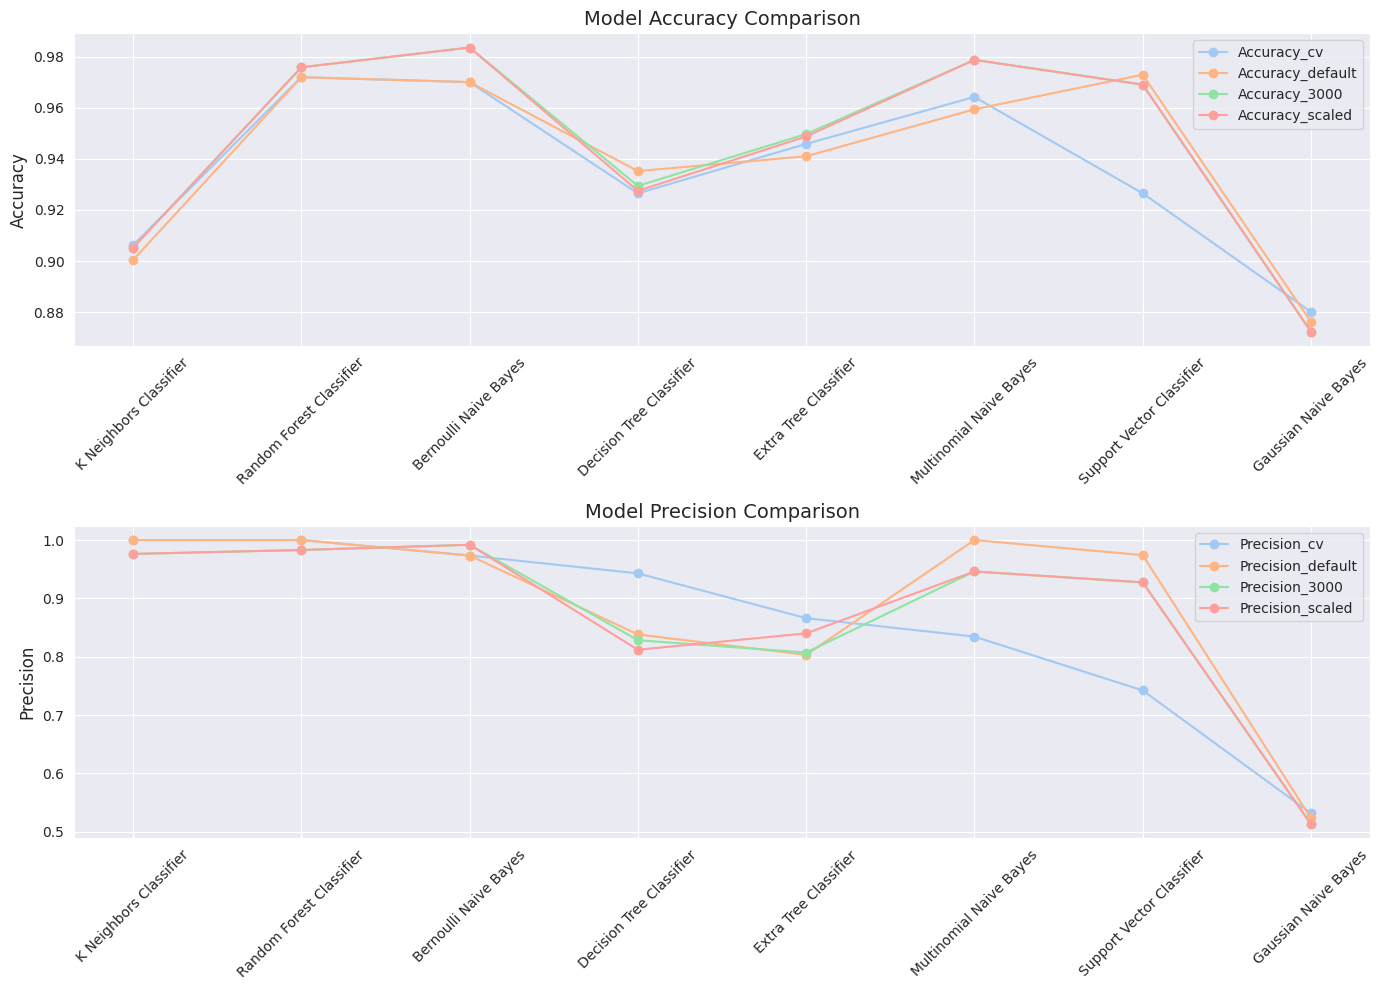

In [ ]:
performance_df = pd.DataFrame(performance)

# Plotting performance metrics
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
sns.set_palette('coolwarm')
sns.set_style('darkgrid')

# Accuracy Plot
for col in ["Accuracy_cv", "Accuracy_default", "Accuracy_3000", "Accuracy_scaled"]:
    ax[0].plot(performance_df["Model"], performance_df[col], marker="o", label=col)
ax[0].set_title("Model Accuracy Comparison", fontsize=14)
ax[0].set_ylabel("Accuracy", fontsize=12)
ax[0].legend()
ax[0].grid(True)
ax[0].tick_params(axis='x', rotation=45)

# Precision Plot
for col in ["Precision_cv", "Precision_default", "Precision_3000", "Precision_scaled"]:
    ax[1].plot(performance_df["Model"], performance_df[col], marker="o", label=col)
ax[1].set_title("Model Precision Comparison", fontsize=14)
ax[1].set_ylabel("Precision", fontsize=12)
ax[1].legend()
ax[1].grid(True)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import pickle

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['transformed_text'], data['num_chars']).toarray()
X = scaler.fit_transform(X)
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

best_model = BernoulliNB()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")

pickle.dump(best_model, open('model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))


Model Accuracy: 0.98
Model Precision: 0.99
